# CSE-CIC-IDS 2017 Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

KeyboardInterrupt: 

In [ ]:
NOTEBOOK_PATH = "D:/Delta Stuff/Scifair20/"

In [3]:
import glob

In [4]:
f_names = glob.glob(NOTEBOOK_PATH + "IDS2017/MachineLearningCVE/*.csv")
df = pd.concat((pd.read_csv(f) for f in f_names))

C:\Users\Xetrov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  
C:\Users\Xetrov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  


In [5]:
df.shape

(2830743, 79)

In [6]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
df.columns # consider stripping whitespace on column names

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
df.columns = list(map(lambda x: x.strip(), df.columns))

In [11]:
df["Label"].value_counts() / len(df)

BENIGN                        0.803004
DoS Hulk                      0.081630
PortScan                      0.056144
DDoS                          0.045227
DoS GoldenEye                 0.003636
FTP-Patator                   0.002804
SSH-Patator                   0.002083
DoS slowloris                 0.002048
DoS Slowhttptest              0.001943
Bot                           0.000695
Web Attack � Brute Force      0.000532
Web Attack � XSS              0.000230
Infiltration                  0.000013
Web Attack � Sql Injection    0.000007
Heartbleed                    0.000004
Name: Label, dtype: float64

# Identify types of variables

In [35]:
df[df.columns[14]].unique().astype('float64').round()

array([4.00000e+06, 1.10092e+05, 2.30769e+05, ..., 8.19500e+03,
       4.27000e+02, 4.36100e+03])

In [38]:
cat_vars = []
for i in range(len(df.columns)):
    unique = df[df.columns[i]].unique()
    if np.all(unique == unique.astype('float64').round()):
        print(df.columns[i] + ": " + str(len(unique)))
        cat_vars.append((i, df.columns[i]))

Destination Port: 53805
Flow Duration: 1050899
Total Fwd Packets: 1432
Total Backward Packets: 1747
Total Length of Fwd Packets: 17928
Total Length of Bwd Packets: 64698
Fwd Packet Length Max: 5279
Fwd Packet Length Min: 384
Bwd Packet Length Max: 4838
Bwd Packet Length Min: 583
Flow IAT Max: 580289
Flow IAT Min: 136316
Fwd IAT Total: 493098
Fwd IAT Max: 437316
Fwd IAT Min: 110631
Bwd IAT Total: 414928
Bwd IAT Max: 368285
Bwd IAT Min: 66074
Fwd PSH Flags: 2
Bwd PSH Flags: 1
Fwd URG Flags: 2
Bwd URG Flags: 1
Fwd Header Length: 3771
Bwd Header Length: 3945
Min Packet Length: 215
Max Packet Length: 5708
FIN Flag Count: 2
SYN Flag Count: 2
RST Flag Count: 2
PSH Flag Count: 2
ACK Flag Count: 2
URG Flag Count: 2
CWE Flag Count: 2
ECE Flag Count: 2
Down/Up Ratio: 31
Fwd Header Length.1: 3771
Fwd Avg Bytes/Bulk: 1
Fwd Avg Packets/Bulk: 1
Fwd Avg Bulk Rate: 1
Bwd Avg Bytes/Bulk: 1
Bwd Avg Packets/Bulk: 1
Bwd Avg Bulk Rate: 1
Subflow Fwd Packets: 1432
Subflow Fwd Bytes: 17928
Subflow Bwd Packets

ValueError: could not convert string to float: 'BENIGN'

In [43]:
info = df.describe()

In [48]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 80

In [49]:
info.T

,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.000,8071.483,18283.632,0.000,53.000,80.000,443.000,65535.000
Flow Duration,2830743.000,14785663.930,33653744.086,-13.000,155.000,31316.000,3204828.500,119999998.000
Total Fwd Packets,2830743.000,9.361,749.673,1.000,2.000,2.000,5.000,219759.000
Total Backward Packets,2830743.000,10.394,997.388,0.000,1.000,2.000,4.000,291922.000
Total Length of Fwd Packets,2830743.000,549.302,9993.589,0.000,12.000,62.000,187.000,12900000.000
Total Length of Bwd Packets,2830743.000,16162.643,2263088.052,0.000,0.000,123.000,482.000,655453030.000
Fwd Packet Length Max,2830743.000,207.600,717.185,0.000,6.000,37.000,81.000,24820.000
Fwd Packet Length Min,2830743.000,18.714,60.339,0.000,0.000,2.000,36.000,2325.000
Fwd Packet Length Mean,2830743.000,58.202,186.091,0.000,6.000,34.000,50.000,5940.857
Fwd Packet Length Std,2830743.000,68.910,281.187,0.000,0.000,0.000,26.163,7125.597


In [7]:
# Remove variables with no variance
remove_vars = []
for i in range(len(df.columns)):
    col = df.columns[i]
    unique = df[col].unique()
    if len(unique) <= 1:
        remove_vars.append(col)

In [8]:
remove_vars

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [9]:
df2 = df.drop(remove_vars, axis=1)

In [10]:
df2.shape

(2830743, 71)

# Remove missing values

In [11]:
df2.replace('Infinity', np.finfo(np.float64).max, inplace=True)

In [12]:
df2.dropna(inplace=True)

In [110]:
df2.shape

(2829385, 71)

# Standardize data

# Find the most important variables

In [111]:
from sklearn.feature_selection import SelectKBest

In [112]:
best = SelectKBest(k=10)

In [129]:
X = df2.drop("Label", axis=1)
y = df2.loc[:, "Label"]

In [125]:
df2["Flow Bytes/s"] = df2["Flow Bytes/s"].astype('float64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212D3978588>]],
      dtype=object)

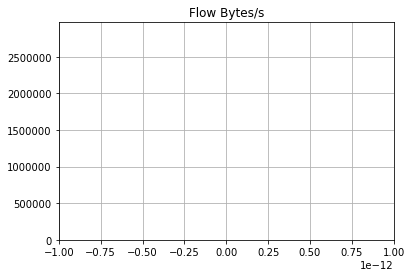

In [127]:
df2.hist(column="Flow Bytes/s", bins=10)

In [130]:
best.fit(X, y)

C:\Users\Xetrov\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Xetrov\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Xetrov\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Xetrov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\__init__.py:474: RuntimeWarning: overflow encountered in square
  X = X ** 2
C:\Users\Xetrov\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Xetrov\AppData\L

SelectKBest(k=10, score_func=<function f_classif at 0x00000212863F3F28>)

In [132]:
X_new = best.transform(X)

In [133]:
X_new.shape

(2829385, 10)

In [135]:
X.columns[best.get_support(indices=True)]

Index(['Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Fwd IAT Std', 'Max Packet Length',
       'Packet Length Std', 'Packet Length Variance', 'Avg Bwd Segment Size',
       'Idle Mean', 'Idle Min'],
      dtype='object')

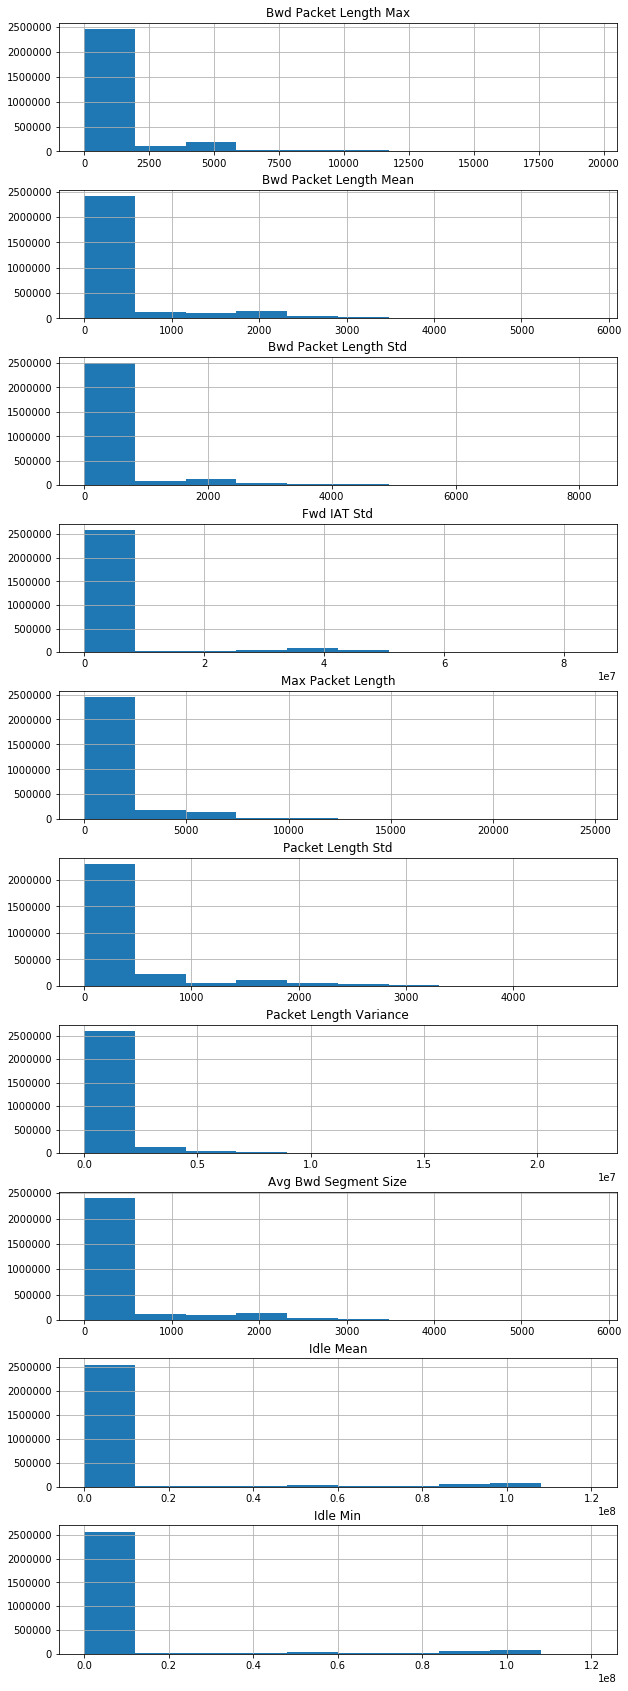

In [141]:
# plt.figure(figsize=(10,30))
fig, ax = plt.subplots(10, figsize=(10,30))

best_cols = X.columns[best.get_support(indices=True)]
for i, col in enumerate(best_cols):
    df2.hist(col, ax=ax[i])
plt.show()

In [ ]:
df2.plot.scatter(x=best_cols[0], c="Label", alpha=0.2)

In [74]:
df2.shape

(2830743, 71)

In [121]:
df2["Flow Bytes/s"].value_counts()['Infinity']

KeyError: 'Infinity'

In [122]:
df2["Flow Bytes/s"].unique()[list(map(lambda x: not is_number(x), df2["Flow Bytes/s"].unique()))]

array([1.7976931348623157e+308, '-12000000', -12000000.0, '-193000000',
       '-8000000', '-666666.6667', '-6000000', '-461538.4615', '-4000000',
       '-1000000', '-261000000'], dtype=object)